In [26]:
import numpy as np
import pymc3 as pm
from pyei.two_by_two import TwoByTwoEI
from pyei.goodmans_er import GoodmansER
from pyei.data import Datasets
from pyei.plot_utils import tomography_plot

# Demo of 2x2 models and plotting using Santa Clara data

We show examples of using and examining models available in `pyei` using a sample data set:

In [28]:
data = Datasets.Santa_Clara.to_dataframe()
X = np.array(data["pct_e_asian_vote"])
T = np.array(data["pct_for_hardy2"])
N = np.array(data["total2"])
demographic_group_name = "e_asian"
candidate_name="Hardy"
precinct_names = data['precinct']
data.head()

,precinct,total_turnout,total2,pct_for_hardy2,pct_for_kolstad2,pct_for_nadeem2,total5,pct_for_caserta5,pct_not_caserta5,pct_for_lacoursiere5,...,pct_for_park5,pct_not_park5,pct_asian_vote,pct_asian_pop,pct_ind_vote,pct_ind_pop,pct_e_asian_vote,pct_e_asian_pop,pct_non_asian_vote,pct_non_asian_pop
0,4201,712,658,0.246201,0.431611,0.322188,642,0.447040,0.552960,0.305296,...,0.247664,0.752336,0.054775,0.117369,0.008427,0.028632,0.046348,0.088736,0.945225,0.882631
1,4208,400,380,0.328947,0.431579,0.239474,379,0.456464,0.543536,0.192612,...,0.350923,0.649077,0.197500,0.214389,0.060000,0.075990,0.137500,0.138399,0.802500,0.785611
2,4211,609,549,0.251366,0.384335,0.364299,542,0.492620,0.507380,0.250922,...,0.256458,0.743542,0.123153,0.202214,0.042693,0.046066,0.080460,0.156147,0.876847,0.797786
3,4215,623,573,0.258290,0.371728,0.369982,558,0.431900,0.568100,0.344086,...,0.224014,0.775986,0.109149,0.162014,0.032103,0.040379,0.077047,0.121635,0.890851,0.837986
4,4217,399,359,0.281337,0.406685,0.311978,355,0.425352,0.574648,0.326761,...,0.247887,0.752113,0.142857,0.254478,0.027569,0.063620,0.115288,0.190859,0.857143,0.745522


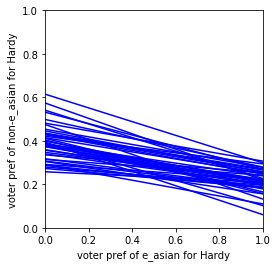

In [29]:
tomography_plot(X,T, demographic_group_name, candidate_name)

## Fitting a modified model from King 1999

This model uses different priors than from King '99: Pareto and uniform hyperparameters are used to perform partial pooling over beta distributions for the groups. The likelihood is the same (binomial) distribution. See, for example [Hierarchical Partial Pooling for Repeated Binary Trials](https://mc-stan.org/rstanarm/articles/pooling.html) for details of this prior structure.

In [30]:
ei = TwoByTwoEI(model_name="king99_pareto_modification", pareto_scale=8, pareto_shape=2)
ei.fit(X, T, N, demographic_group_name=demographic_group_name, candidate_name=candidate_name, precinct_names=precinct_names)
print(ei.summary())

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_2, b_1, kappa_2, phi_2, kappa_1, phi_1]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 116 seconds.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Model: king99_pareto_modification
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        e_asian for Hardy is
        0.818
        The posterior mean for the district-level voting preference of
        non-e_asian for Hardy is
        0.243
        95% Bayesian credible interval for district-level voting preference of
        e_asian for Hardy is
        [0.64023365 0.96128281]
        95% Bayesian credible interval for district-level voting preference of
        non-e_asian for Hardy is
        [0.2177967  0.27297841]
        


### Plotting features for this and any model involving posterior samples:

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc4fa3cf400>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc4fa3d4b50>)

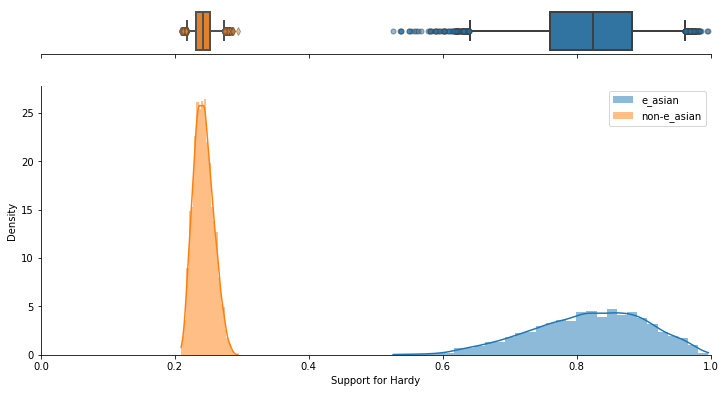

In [47]:
ei.plot()

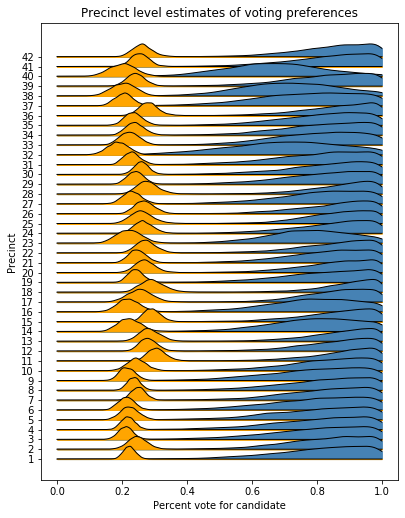

In [32]:
ei.precinct_level_plot()

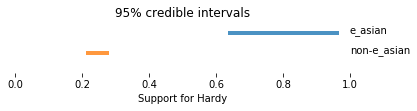

In [54]:
ei.plot_intervals()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc50b3485e0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc50a3931c0>)

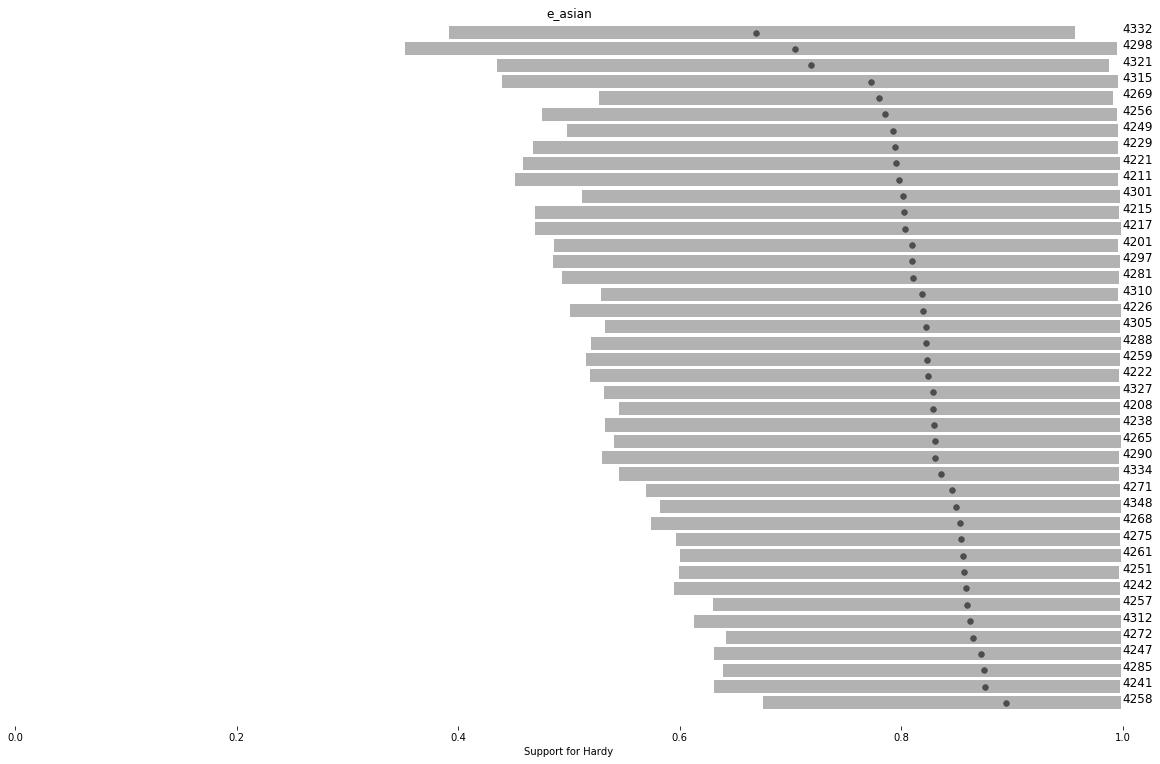

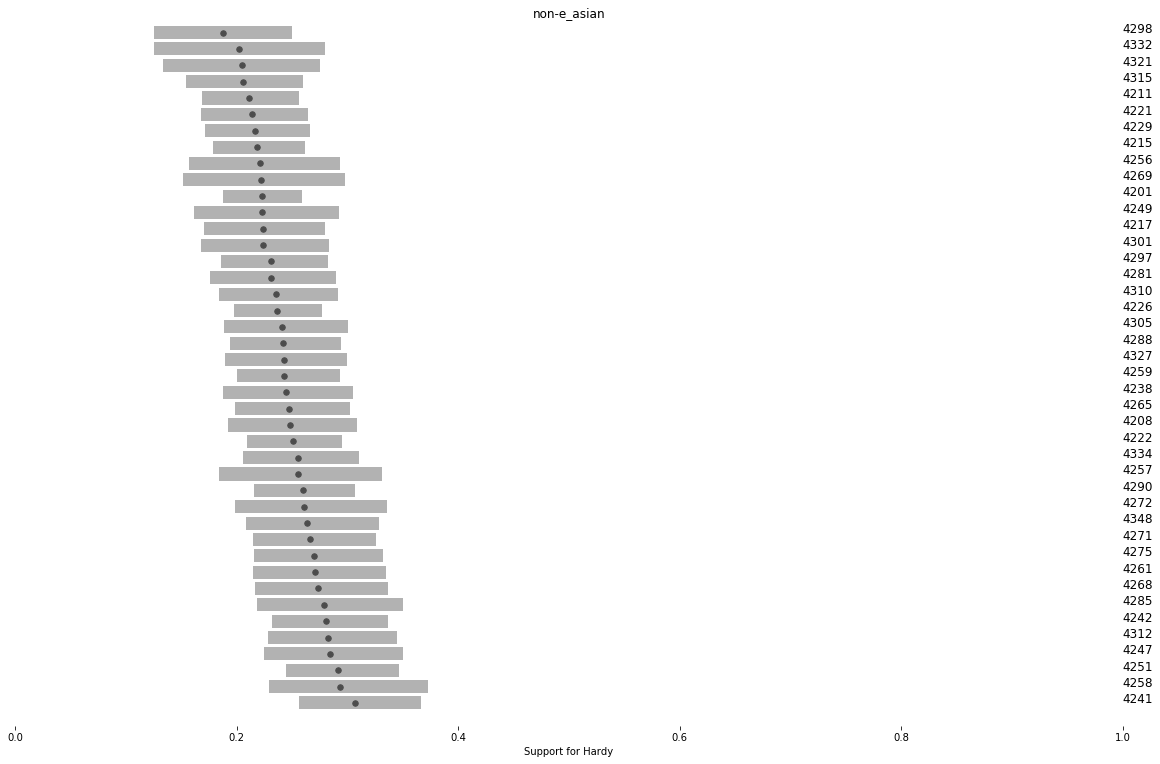

In [34]:
ei.plot_intervals_by_precinct()

## Summary features

In [9]:
print(ei.summary())

Model: king99_pareto_modification
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        e_asian for Hardy is
        0.808
        The posterior mean for the district-level voting preference of
        non-e_asian for Hardy is
        0.244
        95% Bayesian credible interval for district-level voting preference of
        e_asian for Hardy is
        [0.62082031 0.9558768 ]
        95% Bayesian credible interval for district-level voting preference of
        non-e_asian for Hardy is
        [0.21887429 0.27469458]
        


### Posterior mean for district-wide voting preferences (mean of [precinct samples weighted by population]):

In [10]:
posterior_mean_voting_prefs =ei.posterior_mean_voting_prefs
print(demographic_group_name, " support for ", candidate_name, posterior_mean_voting_prefs[0])
print("non-",demographic_group_name, " support for ", candidate_name, posterior_mean_voting_prefs[1])


e_asian  support for  Hardy 0.8083899409454307
non- e_asian  support for  Hardy 0.24443114270814217


### 95% credible intervals

In [11]:
credible_interval_95_mean_voting_prefs = ei.credible_interval_95_mean_voting_prefs
print(demographic_group_name, " support for ", candidate_name, credible_interval_95_mean_voting_prefs[0])
print("non-",demographic_group_name, " support for ", candidate_name, credible_interval_95_mean_voting_prefs[1])


e_asian  support for  Hardy [0.62082031 0.9558768 ]
non- e_asian  support for  Hardy [0.21887429 0.27469458]


### Precinct-level means and credible intervals

In [61]:
precinct_posterior_means_gp1, precinct_posterior_means_gp2, precinct_credible_intervals_gp1, precinct_credible_intervals_gp2 = ei.precinct_level_estimates()
print(precinct_posterior_means_gp1)

[0.81011443 0.82901098 0.79787047 0.80260916 0.80353062 0.7954579
 0.82389067 0.81966425 0.79453228 0.82957954 0.87531995 0.85845203
 0.87237072 0.79258294 0.85711059 0.78546492 0.85943606 0.89502699
 0.82313186 0.85549303 0.83014394 0.85310928 0.7800685  0.84559921
 0.86446398 0.85418286 0.81099035 0.87459765 0.82247687 0.83071164
 0.81013489 0.70453571 0.80203222 0.82223262 0.8184787  0.86256626
 0.77261783 0.71887628 0.82832793 0.66910809 0.83608982 0.84946061]


## Accessing samples

Samples from the posterior distribution of district-wide voter preferences (calculated by weighting each set of precinct-level samples by the population and summing):

In [12]:
sampled_voting_prefs = ei.sampled_voting_prefs # ei.sampled_voting_prefs is samples of district-level voter preference: list of length 2
sampled_voting_prefs[0] #samples of district-wide support of specified group for specified candidate
sampled_voting_prefs[1] #samples of district-wide support of (complement of specified group) for specified candidate
sampled_voting_prefs[0].mean() #posterior mean
sampled_voting_prefs[1].mean() #posterior mean

0.24443114270814217

Precinct level samples of voting preferences:

In [13]:
precinct_num_of_interest = 5
ei.sim_trace["b_1"].shape # num_samples x num_precincts
print("calculate posterior mean for voter preference of ", demographic_group_name, " for ", candidate_name," in precinct ",precinct_num_of_interest )
ei.sim_trace["b_1"][:, precinct_num_of_interest].mean() 

calculate posterior mean for voter preference of  e_asian  for  Hardy  in precinct  5


0.7830214650879728

Posterior samples for hyperparameters are also accessible.

In [14]:
ei.sim_trace["kappa_1"].shape 

(4000,)

## Accessing and visualizing the pymc the model

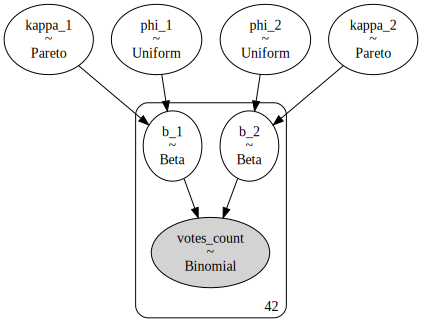

In [15]:
model = ei.sim_model
pm.model_to_graphviz(model)

## Fitting the model from King 1999

This is a faithful representation of the model from King '99: all of the hyperparameters are exponentially distributed with a fixed lambda value. 

In [16]:
ei = TwoByTwoEI(
    "king99", lmbda=0.1
)  # king uses 0.5, but smaller lambdas seem more stable
ei.fit(X, T, N, demographic_group_name="e asian", candidate_name="Hardy")
print(ei.summary())

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_2, b_1, d_2, c_2, d_1, c_1]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 65 seconds.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


Model: king99
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        e asian for Hardy is
        0.809
        The posterior mean for the district-level voting preference of
        non-e asian for Hardy is
        0.244
        95% Bayesian credible interval for district-level voting preference of
        e asian for Hardy is
        [0.58529851 0.95789028]
        95% Bayesian credible interval for district-level voting preference of
        non-e asian for Hardy is
        [0.21790437 0.28322683]
        


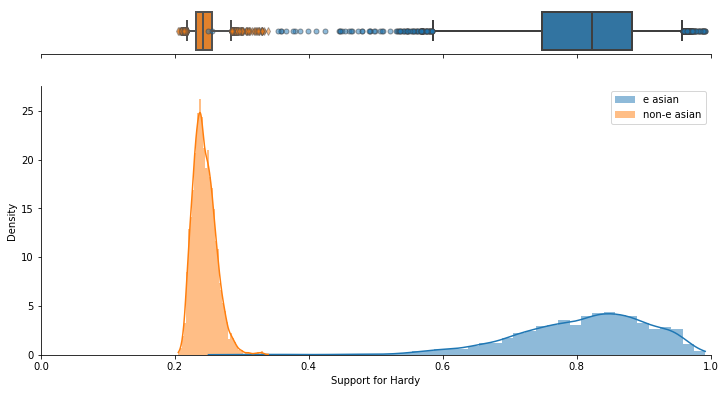

In [17]:
ei.plot();

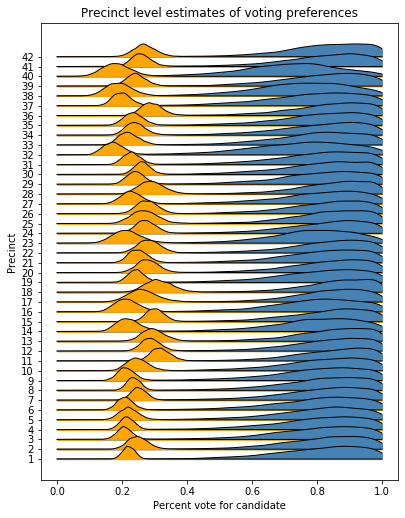

In [18]:
ei.precinct_level_plot()

## Fitting the model(s) from Wakefield 2004

Here, with beta priors

In [19]:
ei = TwoByTwoEI(model_name="wakefield_beta")
ei.fit(X, T, N, demographic_group_name=demographic_group_name, candidate_name=candidate_name, precinct_names=precinct_names)
print(ei.summary())

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_2, b_1, kappa_2, phi_2, kappa_1, phi_1]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 660 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Model: wakefield_beta
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        e_asian for Hardy is
        0.778
        The posterior mean for the district-level voting preference of
        non-e_asian for Hardy is
        0.252
        95% Bayesian credible interval for district-level voting preference of
        e_asian for Hardy is
        [0.56814976 0.93469734]
        95% Bayesian credible interval for district-level voting preference of
        non-e_asian for Hardy is
        [0.22589809 0.28574916]
        


In [20]:
# UNDER DEVELOPMENT
ei = TwoByTwoEI(model_name="wakefield_normal", mu0=0, mu1=0)
ei.fit(X, T, N, demographic_group_name=demographic_group_name, candidate_name=candidate_name, precinct_names=precinct_names)
print(ei.summary())

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta1, theta0, sigma1, sigma0]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 2776 seconds.
There were 73 divergences after tuning. Increase `target_accept` or reparameterize.
There were 215 divergences after tuning. Increase `target_accept` or reparameterize.
There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9586235073623818, but should be close to 0.99. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


Model: wakefield_normal
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        e_asian for Hardy is
        0.451
        The posterior mean for the district-level voting preference of
        non-e_asian for Hardy is
        0.311
        95% Bayesian credible interval for district-level voting preference of
        e_asian for Hardy is
        [0.2958303  0.53786861]
        95% Bayesian credible interval for district-level voting preference of
        non-e_asian for Hardy is
        [0.29321751 0.33960911]
        


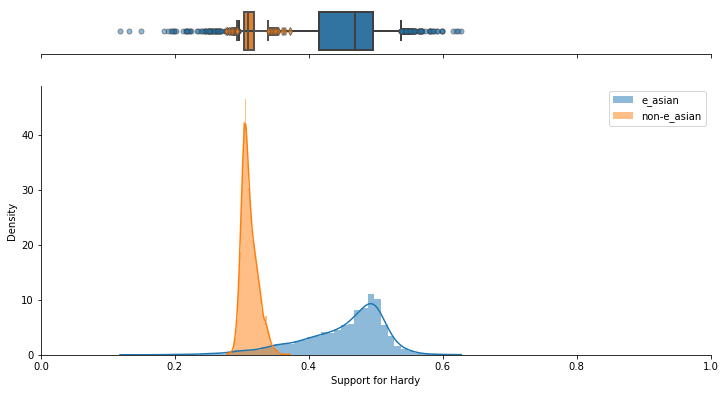

In [21]:
ei.plot();

## Fitting Goodman's ecological regression

In [22]:
goodmans_er = GoodmansER().fit(
    X, T, demographic_group_name="e asian", candidate_name="Hardy"
)
print(goodmans_er.summary())

Goodmans ER
        Est. fraction of e asian
        voters who voted for Hardy is
        0.862
        Est. fraction of non- e asian
        voters who voted for Hardy is
        0.239
        


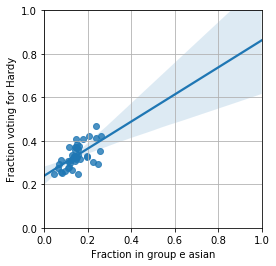

In [23]:
goodmans_er.plot();

## Fitting a weighted version of Goodman's ecological regression

In [24]:
goodmans_er = GoodmansER(is_weighted_regression="True")
goodmans_er.fit(X, T, N, demographic_group_name="e asian", candidate_name="Hardy")
print(goodmans_er.summary())

Goodmans ER, weighted by population
        Est. fraction of e asian
        voters who voted for Hardy is
        0.865
        Est. fraction of non- e asian
        voters who voted for Hardy is
        0.236
        


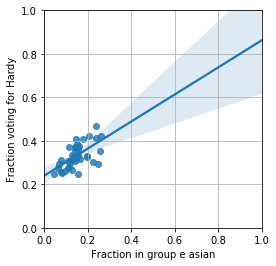

In [25]:
goodmans_er.plot();